# Notebook de Demo Básica

## 1. Instalación

In [ ]:
# Instalar desde GitHub usando tag específico
!pip install -q git+https://github.com/Nicolakorff/tfm-endocrine-llm.git@v0.2.0


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 4.7 MB/s eta 0:00:00


## 2. Imports

In [ ]:
from endocrine_llm import (
    EndocrineModulatedLLM,
    HORMONE_PROFILES,
    TextMetrics
)

print("✅ Librería importada correctamente")

✅ Librería importada correctamente


## 3. Inicializar Modelo

In [ ]:
# Inicializar sistema
model = EndocrineModulatedLLM("gpt2")

Inicializando EndocrineModulatedLLM
Modelo: gpt2
   Dispositivo: cpu


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Sistema inicializado
Parámetros: 124.4M
Tokens empáticos: 34


## 4. Ejemplo Básico

In [ ]:
# Prompt de prueba
prompt = "I'm feeling anxious about my exam tomorrow."

print(f"📝 Prompt: '{prompt}'\n")
print("="*80)

# Probar diferentes perfiles
for profile_name in ["baseline", "empathic", "creative"]:
    profile = HORMONE_PROFILES[profile_name]

    print(f"\n🧬 Perfil: {profile_name.upper()}")
    print(f"   {profile}")

    # Generar
    texts = model.generate_with_hormones(
        prompt=prompt,
        hormone_profile=profile,
        max_new_tokens=40
    )

    # Mostrar resultado
    print(f"\n   Texto generado:")
    print(f"   {texts[0]}")

    # Calcular métricas
    metrics = TextMetrics.compute_all(texts[0])
    print(f"\n   📊 Métricas:")
    print(f"      Diversidad: {metrics['distinct_2']:.3f}")
    print(f"      Polaridad: {metrics['sentiment_polarity']:.3f}")
    print(f"      Longitud: {metrics['length']} tokens")

    print("\n" + "-"*80)

📝 Prompt: 'I'm feeling anxious about my exam tomorrow.'


🧬 Perfil: BASELINE
   H[d=0.50, c=0.50, o=0.50, a=0.50, s=0.50]

   Texto generado:
   I'm feeling anxious about my exam tomorrow. My exams can be an inconvenience or an inconvenience to me for two days because of how I have become like a teenager. But since this is normal and all, I want to help me. My exams

   📊 Métricas:
      Diversidad: 0.953
      Polaridad: -0.050
      Longitud: 44 tokens

--------------------------------------------------------------------------------

🧬 Perfil: EMPATHIC
   H[d=0.60, c=0.40, o=0.90, a=0.40, s=0.70]

   Texto generado:
   I'm feeling anxious about my exam tomorrow.

Jenna stares intently at the ceiling. "I'll find you soon," she tells herself, and the man takes a few small steps before looking directly up at her. With one hand

   📊 Métricas:
      Diversidad: 1.000
      Polaridad: -0.150
      Longitud: 37 tokens

-----------------------------------------------------------------------

## 5. Comparación Visual

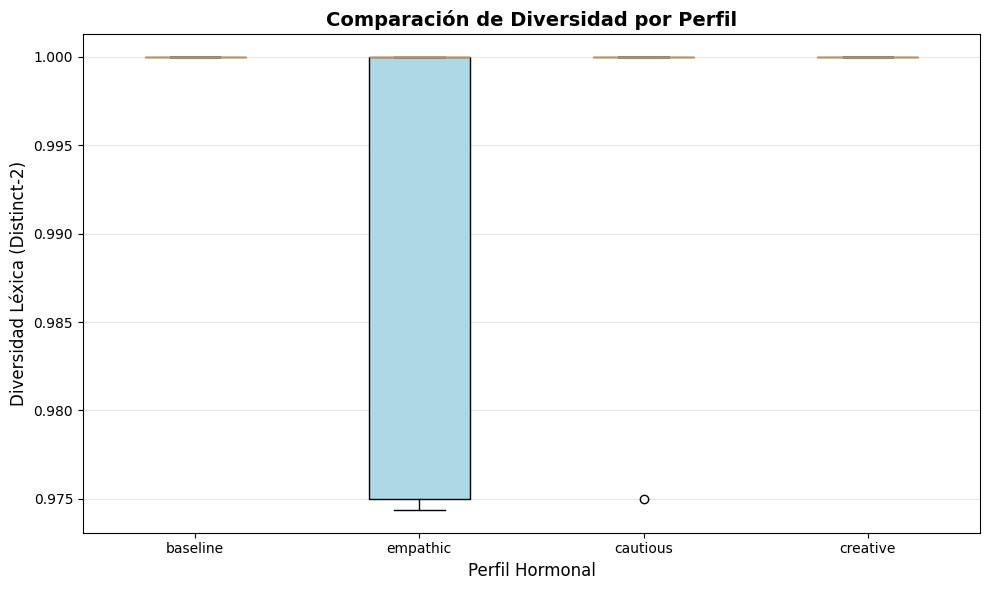

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generar múltiples muestras
profiles_to_test = ["baseline", "empathic", "cautious", "creative"]
metrics_collected = {profile: [] for profile in profiles_to_test}

for profile_name in profiles_to_test:
    for _ in range(5):  # 5 muestras por perfil
        texts = model.generate_with_hormones(
            prompt,
            HORMONE_PROFILES[profile_name],
            max_new_tokens=40
        )
        metrics = TextMetrics.compute_all(texts[0])
        metrics_collected[profile_name].append(metrics['distinct_2'])

# Visualizar
fig, ax = plt.subplots(figsize=(10, 6))

positions = range(len(profiles_to_test))
data = [metrics_collected[p] for p in profiles_to_test]

bp = ax.boxplot(data, labels=profiles_to_test, patch_artist=True)

for patch in bp['boxes']:
    patch.set_facecolor('lightblue')

ax.set_xlabel('Perfil Hormonal', fontsize=12)
ax.set_ylabel('Diversidad Léxica (Distinct-2)', fontsize=12)
ax.set_title('Comparación de Diversidad por Perfil', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()